In [2]:
import pandas as pd
df = pd.read_csv('/Users/marilynelkassis/Desktop/RETAIL PROJECT/Iowa_Liquor_Sales_DEC2023.csv')
df.head()

/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_45646/654003126.py:2: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/marilynelkassis/Desktop/RETAIL PROJECT/Iowa_Liquor_Sales_DEC2023.csv')


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,...,Item Number,Item Description,Pack,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,S03394400014,01/03/2012,4334,FAREWAY STORES #114 / DUBUQUE,2050 JOHN F KENNEDY RD,DUBUQUE,52001,NaN,31.0,DUBUQUE,...,25601,SEAGRAMS 7 CROWN BL WHISKEY MINI,12,500,6.17,9.25,2,18.50,1.0,0.26
1,S03381400069,01/03/2012,3354,SAM'S CLUB 8238 / DAVENPORT,3845 ELMORE AVE.,DAVENPORT,52807,POINT (-90.527081 41.559731),82.0,SCOTT,...,66936,GRANGALA TRIPLE ORANGE LIQUEUR,12,750,10.99,16.49,36,593.64,27.0,7.13
2,S03384600026,01/03/2012,2190,"CENTRAL CITY LIQUOR, INC.",1460 2ND AVE,DES MOINES,50314,POINT (-93.619787 41.60566),77.0,POLK,...,11297,CROWN ROYAL CANADIAN WHISKY,12,1000,17.46,26.19,24,628.56,24.0,6.34
3,S03391400005,01/03/2012,4272,FAREWAY STORES #407 / ESTERVILLE,1108 CENTRAL AVE,ESTHERVILLE,51334,POINT (-94.829963 43.402096),32.0,EMMET,...,8828,LAUDER'S,6,1750,11.18,16.76,6,100.56,10.5,2.77
4,S03410300009,01/03/2012,3495,GREAT PASTIMES,228 N MAIN ST,MONTICELLO,52310,POINT (-91.183413 42.24013200000001),53.0,JONES,...,11786,BLACK VELVET TRAVELER,12,750,4.83,7.44,12,89.28,9.0,2.38


In [3]:
#print columns
print(df.columns)

Index(['Invoice/Item Number', 'Date', 'Store Number', 'Store Name', 'Address',
       'City', 'Zip Code', 'Store Location', 'County Number', 'County',
       'Category', 'Category Name', 'Vendor Number', 'Vendor Name',
       'Item Number', 'Item Description', 'Pack', 'Bottle Volume (ml)',
       'State Bottle Cost', 'State Bottle Retail', 'Bottles Sold',
       'Sale (Dollars)', 'Volume Sold (Liters)', 'Volume Sold (Gallons)'],
      dtype='object')


In [4]:
#print the following columns  'Category', 'Category Name', 'Vendor Number', 'Vendor Name
print(df[['Category', 'Category Name', 'Vendor Number', 'Vendor Name']])

           Category                       Category Name  Vendor Number  \
0         1011100.0                    BLENDED WHISKIES          260.0   
1         1082900.0  MISC. IMPORTED CORDIALS & LIQUEURS          330.0   
2         1012100.0                   CANADIAN WHISKIES          260.0   
3         1012200.0                     SCOTCH WHISKIES           55.0   
4         1012100.0                   CANADIAN WHISKIES          115.0   
...             ...                                 ...            ...   
27934716  1081600.0                     WHISKEY LIQUEUR          259.0   
27934717  1062200.0                           WHITE RUM          777.0   
27934718  1031100.0                     AMERICAN VODKAS          421.0   
27934719  1082200.0                   IMPORTED SCHNAPPS          421.0   
27934720  1012100.0                   CANADIAN WHISKIES          260.0   

                               Vendor Name  
0                          DIAGEO AMERICAS  
1                    

In [5]:
#which brand has multiple bottle volumes in the dataset?
print(df['Item Description'].value_counts())


Item Description
BLACK VELVET                        704825
HAWKEYE VODKA                       611436
FIREBALL CINNAMON WHISKEY           418098
TITOS HANDMADE VODKA                398298
FIVE O'CLOCK VODKA                  382764
                                     ...  
LAZZARONI AMARETTO LIQUEUR               1
AMARAS LOGIA CENIZO MEZCAL               1
AMARAS LOGIA SIERRA NEGRA MEZCAL         1
GAME ODE DILL AQUAVIT                    1
SHEEP DIP BLENDED MALT WHISKY            1
Name: count, Length: 12159, dtype: int64


In [1]:
import pandas as pd

# Load the dataset
file_path = '/Users/marilynelkassis/Desktop/RETAIL PROJECT/Iowa_Liquor_Sales_DEC2023.csv'
data = pd.read_csv(file_path)

# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Filter data for Burnett's vodka
burnett_data = data[data['Item Description'].str.contains("BURNETT", case=False, na=False)].copy()

# Extract year from Date column
burnett_data['Year'] = burnett_data['Date'].dt.year

# Group by year and aggregate required metrics
annual_data = burnett_data.groupby('Year').agg({
    'Sale (Dollars)': 'sum'
}).reset_index()

# Determine best and worst years based on total revenue
best_year = annual_data.loc[annual_data['Sale (Dollars)'].idxmax()]
worst_year = annual_data.loc[annual_data['Sale (Dollars)'].idxmin()]

# Filter data for the best and worst years
best_year_data = burnett_data[burnett_data['Year'] == best_year['Year']]
worst_year_data = burnett_data[burnett_data['Year'] == worst_year['Year']]

# Aggregate sales by store number for the best year
best_year_store_sales = best_year_data.groupby('Store Number').agg({
    'Sale (Dollars)': 'sum',
    'Store Number': 'count'
}).rename(columns={'Store Number': 'Sales Count'}).reset_index()

# Aggregate sales by store number for the worst year
worst_year_store_sales = worst_year_data.groupby('Store Number').agg({
    'Sale (Dollars)': 'sum',
    'Store Number': 'count'
}).rename(columns={'Store Number': 'Sales Count'}).reset_index()

# Best year - store number with the most sales
best_year_most_sales_store = best_year_store_sales.loc[best_year_store_sales['Sale (Dollars)'].idxmax()]
# Worst year - store number with the most sales
worst_year_most_sales_store = worst_year_store_sales.loc[worst_year_store_sales['Sale (Dollars)'].idxmax()]

# Best year - store number with the most sales count
best_year_most_sales_count_store = best_year_store_sales.loc[best_year_store_sales['Sales Count'].idxmax()]
# Worst year - store number with the most sales count
worst_year_most_sales_count_store = worst_year_store_sales.loc[worst_year_store_sales['Sales Count'].idxmax()]

# Print the results
print("Best Year - Store with Most Sales (Revenue):")
print(best_year_most_sales_store)

print("\nBest Year - Store with Most Sales (Count):")
print(best_year_most_sales_count_store)

print("\nWorst Year - Store with Most Sales (Revenue):")
print(worst_year_most_sales_store)

print("\nWorst Year - Store with Most Sales (Count):")
print(worst_year_most_sales_count_store)


/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_959/3935710440.py:5: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


Best Year - Store with Most Sales (Revenue):
Store Number       3926.0
Sale (Dollars)    40828.2
Sales Count         358.0
Name: 206, dtype: float64

Best Year - Store with Most Sales (Count):
Store Number       3926.0
Sale (Dollars)    40828.2
Sales Count         358.0
Name: 206, dtype: float64

Worst Year - Store with Most Sales (Revenue):
Store Number       2501.0
Sale (Dollars)    17802.0
Sales Count         137.0
Name: 10, dtype: float64

Worst Year - Store with Most Sales (Count):
Store Number      2603.0
Sale (Dollars)    6073.5
Sales Count        206.0
Name: 70, dtype: float64


In [1]:
import pandas as pd

# Load the dataset
file_path = 'Iowa_Liquor_Sales_DEC2023.csv'
df = pd.read_csv(file_path)

# Filter the dataset for item descriptions containing "burnetts" (case insensitive)
burnetts_data = df[df['Item Description'].str.contains('burnetts', case=False, na=False)]

# Find the store with the most sales of "burnetts"
most_sales_store = burnetts_data.groupby(['Store Number', 'Store Name'])['Sale (Dollars)'].sum().idxmax()
most_sales_amount = burnetts_data.groupby(['Store Number', 'Store Name'])['Sale (Dollars)'].sum().max()

# Find the number of unique stores selling "burnetts"
unique_stores_count = burnetts_data['Store Number'].nunique()

# Display the results
print(f'Store with the most sales of "burnetts": {most_sales_store} with sales amount: ${most_sales_amount}')
print(f'Number of unique stores selling "burnetts": {unique_stores_count}')


/var/folders/m7/s2pnwq9j1tj4h07p5sm0s1tw0000gn/T/ipykernel_4080/1173926133.py:5: DtypeWarning: Columns (6,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Store with the most sales of "burnetts": (2501, 'HY-VEE  #2 / AMES') with sales amount: $144158.46
Number of unique stores selling "burnetts": 1126


In [2]:
burnetts_data = df[df['Item Description'].str.contains('burnetts', case=False, na=False)]

# Aggregate sales by county
county_sales = burnetts_data.groupby('County')['Sale (Dollars)'].sum()

# Find the county with the highest sales
most_sales_county = county_sales.idxmax()
most_sales_amount = county_sales.max()

# Display the results
print(f'County with the most sales of "burnetts": {most_sales_county} with sales amount: ${most_sales_amount}')

County with the most sales of "burnetts": POLK with sales amount: $687067.92


In [4]:
# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the date
df['Year'] = df['Date'].dt.year

# Function to analyze data for a specific year
def analyze_year(year):
    # Filter the dataset for the given year
    year_data = df[df['Year'] == year]
    
    # Filter the dataset for item descriptions containing "burnetts" (case insensitive)
    burnetts_data = year_data[year_data['Item Description'].str.contains('burnetts', case=False, na=False)]
    
    # Find the store with the most sales of "burnetts"
    most_sales_store = burnetts_data.groupby(['Store Number', 'Store Name'])['Sale (Dollars)'].sum().idxmax()
    most_sales_amount_store = burnetts_data.groupby(['Store Number', 'Store Name'])['Sale (Dollars)'].sum().max()
    
    # Find the number of unique stores selling "burnetts"
    unique_stores_count = burnetts_data['Store Number'].nunique()
    
    # Aggregate sales by county
    county_sales = burnetts_data.groupby('County')['Sale (Dollars)'].sum()
    
    # Find the county with the highest sales
    most_sales_county = county_sales.idxmax()
    most_sales_amount_county = county_sales.max()
    
    return {
        'year': year,
        'most_sales_store': most_sales_store,
        'most_sales_amount_store': most_sales_amount_store,
        'unique_stores_count': unique_stores_count,
        'most_sales_county': most_sales_county,
        'most_sales_amount_county': most_sales_amount_county
    }

# Analyze data for the best year (2017) and the worst year (2023)
best_year_results = analyze_year(2017)
worst_year_results = analyze_year(2023)

# Display the results
print(f"Best Year (2017):")
print(f"Store with the most sales of 'Burnett's': {best_year_results['most_sales_store']} with sales amount: ${best_year_results['most_sales_amount_store']}")
print(f"Number of unique stores selling 'Burnett's': {best_year_results['unique_stores_count']}")
print(f"County with the most sales of 'Burnett's': {best_year_results['most_sales_county']} with sales amount: ${best_year_results['most_sales_amount_county']}")

print(f"\nWorst Year (2023):")
print(f"Store with the most sales of 'Burnett's': {worst_year_results['most_sales_store']} with sales amount: ${worst_year_results['most_sales_amount_store']}")
print(f"Number of unique stores selling 'Burnett's': {worst_year_results['unique_stores_count']}")
print(f"County with the most sales of 'Burnett's': {worst_year_results['most_sales_county']} with sales amount: ${worst_year_results['most_sales_amount_county']}")




Best Year (2017):
Store with the most sales of 'Burnett's': (3926, 'LIQUOR DOWNTOWN / IOWA CITY') with sales amount: $4112.64
Number of unique stores selling 'Burnett's': 171
County with the most sales of 'Burnett's': JOHNSON with sales amount: $12868.8

Worst Year (2023):
Store with the most sales of 'Burnett's': (2501, 'HY-VEE  #2 (1018) / AMES') with sales amount: $17802.0
Number of unique stores selling 'Burnett's': 460
County with the most sales of 'Burnett's': POLK with sales amount: $66019.5


In [5]:
# Function to get total sales for a specific year
def total_sales_year(year):
    # Filter the dataset for the given year
    year_data = df[df['Year'] == year]
    
    # Filter the dataset for item descriptions containing "burnetts" (case insensitive)
    burnetts_data = year_data[year_data['Item Description'].str.contains('burnetts', case=False, na=False)]
    
    # Calculate total sales
    total_sales = burnetts_data['Sale (Dollars)'].sum()
    
    return total_sales

# Calculate total sales for the best year (2017) and the worst year (2023)
total_sales_2017 = total_sales_year(2017)
total_sales_2023 = total_sales_year(2023)

# Display the total sales
print(f"Total sales of 'Burnett's' in 2017: ${total_sales_2017}")
print(f"Total sales of 'Burnett's' in 2023: ${total_sales_2023}")


Total sales of 'Burnett's' in 2017: $63053.76
Total sales of 'Burnett's' in 2023: $400949.82


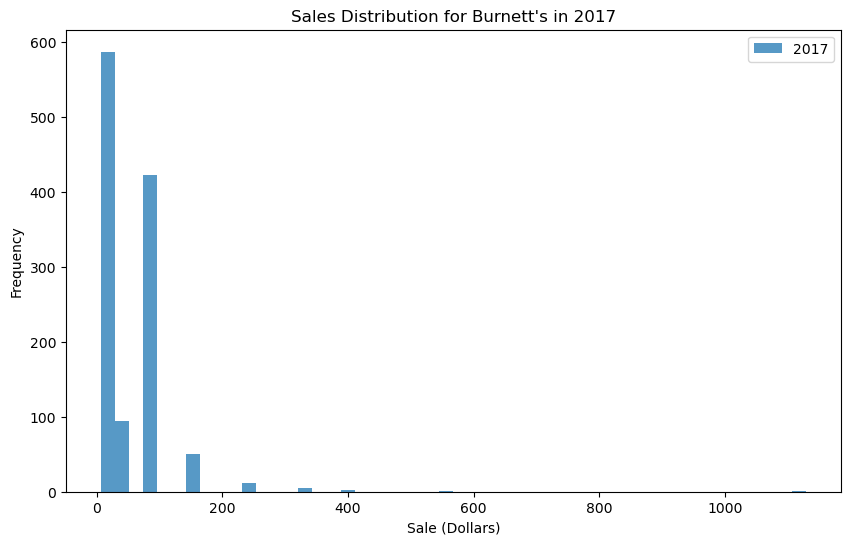

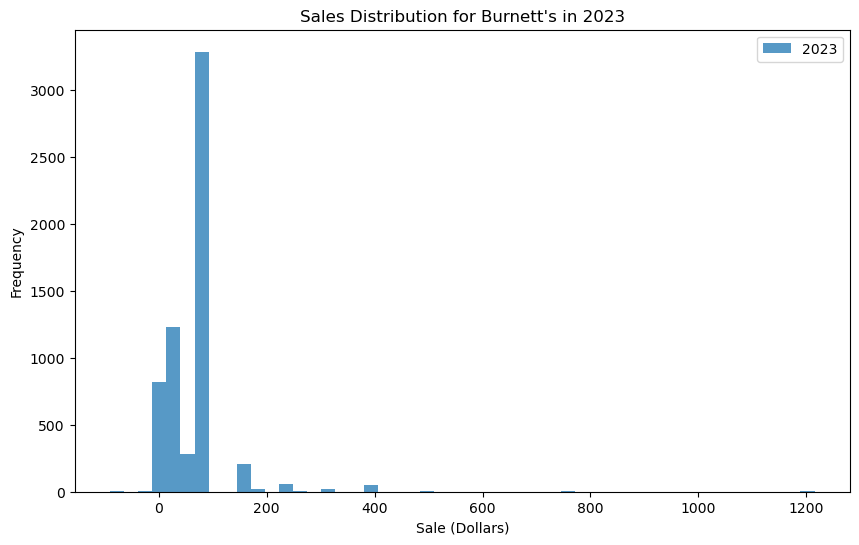

In [6]:
import matplotlib.pyplot as plt

# Function to plot sales distribution for a specific year
def plot_sales_distribution(year):
    # Filter the dataset for the given year
    year_data = df[df['Year'] == year]
    
    # Filter the dataset for item descriptions containing "burnetts" (case insensitive)
    burnetts_data = year_data[year_data['Item Description'].str.contains('burnetts', case=False, na=False)]
    
    # Plot sales distribution
    plt.figure(figsize=(10, 6))
    plt.hist(burnetts_data['Sale (Dollars)'], bins=50, alpha=0.75, label=f'{year}')
    plt.xlabel('Sale (Dollars)')
    plt.ylabel('Frequency')
    plt.title(f'Sales Distribution for Burnett\'s in {year}')
    plt.legend()
    plt.show()

# Plot sales distribution for 2017 and 2023
plot_sales_distribution(2017)
plot_sales_distribution(2023)


In [7]:

# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the date
df['Year'] = df['Date'].dt.year

# Function to analyze data for a specific year
def analyze_year(year):
    # Filter the dataset for the given year
    year_data = df[df['Year'] == year]
    
    # Filter the dataset for item descriptions containing "burnetts" (case insensitive)
    burnetts_data = year_data[year_data['Item Description'].str.contains('burnetts', case=False, na=False)]
    
    # Find the store with the most revenue from "burnetts"
    most_revenue_store = burnetts_data.groupby(['Store Number', 'Store Name'])['Sale (Dollars)'].sum().idxmax()
    most_revenue_amount_store = burnetts_data.groupby(['Store Number', 'Store Name'])['Sale (Dollars)'].sum().max()
    
    # Find the number of unique stores selling "burnetts"
    unique_stores_count = burnetts_data['Store Number'].nunique()
    
    # Aggregate revenue by county
    county_revenue = burnetts_data.groupby('County')['Sale (Dollars)'].sum()
    
    # Find the county with the highest revenue
    most_revenue_county = county_revenue.idxmax()
    most_revenue_amount_county = county_revenue.max()
    
    return {
        'year': year,
        'most_revenue_store': most_revenue_store,
        'most_revenue_amount_store': most_revenue_amount_store,
        'unique_stores_count': unique_stores_count,
        'most_revenue_county': most_revenue_county,
        'most_revenue_amount_county': most_revenue_amount_county
    }

# Analyze data for the best year (2017) and the worst year (2023)
best_year_results = analyze_year(2017)
worst_year_results = analyze_year(2023)

# Display the results
print(f"Best Year (2017):")
print(f"Store with the most revenue from 'Burnett's': {best_year_results['most_revenue_store']} with revenue amount: ${best_year_results['most_revenue_amount_store']}")
print(f"Number of unique stores selling 'Burnett's': {best_year_results['unique_stores_count']}")
print(f"County contributing the most to 'Burnett's' revenue: {best_year_results['most_revenue_county']} with revenue amount: ${best_year_results['most_revenue_amount_county']}")

print(f"\nWorst Year (2023):")
print(f"Store with the most revenue from 'Burnett's': {worst_year_results['most_revenue_store']} with revenue amount: ${worst_year_results['most_revenue_amount_store']}")
print(f"Number of unique stores selling 'Burnett's': {worst_year_results['unique_stores_count']}")
print(f"County contributing the most to 'Burnett's' revenue: {worst_year_results['most_revenue_county']} with revenue amount: ${worst_year_results['most_revenue_amount_county']}")

Best Year (2017):
Store with the most revenue from 'Burnett's': (3926, 'LIQUOR DOWNTOWN / IOWA CITY') with revenue amount: $4112.64
Number of unique stores selling 'Burnett's': 171
County contributing the most to 'Burnett's' revenue: JOHNSON with revenue amount: $12868.8

Worst Year (2023):
Store with the most revenue from 'Burnett's': (2501, 'HY-VEE  #2 (1018) / AMES') with revenue amount: $17802.0
Number of unique stores selling 'Burnett's': 460
County contributing the most to 'Burnett's' revenue: POLK with revenue amount: $66019.5


In [8]:


# Ensure the date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the date
df['Year'] = df['Date'].dt.year

# Function to analyze data for a specific year
def analyze_year_sales(year):
    # Filter the dataset for the given year
    year_data = df[df['Year'] == year]
    
    # Filter the dataset for item descriptions containing "burnetts" (case insensitive)
    burnetts_data = year_data[year_data['Item Description'].str.contains('burnetts', case=False, na=False)]
    
    # Find the store with the most sales of "burnetts"
    most_sales_store = burnetts_data.groupby(['Store Number', 'Store Name'])['Bottles Sold'].sum().idxmax()
    most_sales_amount_store = burnetts_data.groupby(['Store Number', 'Store Name'])['Bottles Sold'].sum().max()
    
    # Find the number of unique stores selling "burnetts"
    unique_stores_count = burnetts_data['Store Number'].nunique()
    
    # Aggregate sales by county
    county_sales = burnetts_data.groupby('County')['Bottles Sold'].sum()
    
    # Find the county with the highest sales
    most_sales_county = county_sales.idxmax()
    most_sales_amount_county = county_sales.max()
    
    return {
        'year': year,
        'most_sales_store': most_sales_store,
        'most_sales_amount_store': most_sales_amount_store,
        'unique_stores_count': unique_stores_count,
        'most_sales_county': most_sales_county,
        'most_sales_amount_county': most_sales_amount_county
    }

# Analyze data for the best year (2017) and the worst year (2023)
best_year_sales_results = analyze_year_sales(2017)
worst_year_sales_results = analyze_year_sales(2023)

# Display the results
print(f"Best Year (2017):")
print(f"Store with the most sales of 'Burnett's': {best_year_sales_results['most_sales_store']} with sales amount: {best_year_sales_results['most_sales_amount_store']} bottles")
print(f"Number of unique stores selling 'Burnett's': {best_year_sales_results['unique_stores_count']}")
print(f"County with the most sales of 'Burnett's': {best_year_sales_results['most_sales_county']} with sales amount: {best_year_sales_results['most_sales_amount_county']} bottles")

print(f"\nWorst Year (2023):")
print(f"Store with the most sales of 'Burnett's': {worst_year_sales_results['most_sales_store']} with sales amount: {worst_year_sales_results['most_sales_amount_store']} bottles")
print(f"Number of unique stores selling 'Burnett's': {worst_year_sales_results['unique_stores_count']}")
print(f"County with the most sales of 'Burnett's': {worst_year_sales_results['most_sales_county']} with sales amount: {worst_year_sales_results['most_sales_amount_county']} bottles")


Best Year (2017):
Store with the most sales of 'Burnett's': (3926, 'LIQUOR DOWNTOWN / IOWA CITY') with sales amount: 602 bottles
Number of unique stores selling 'Burnett's': 171
County with the most sales of 'Burnett's': JOHNSON with sales amount: 1884 bottles

Worst Year (2023):
Store with the most sales of 'Burnett's': (2512, 'HY-VEE WINE AND SPIRITS #1 (1281) / IOWA CITY') with sales amount: 2460 bottles
Number of unique stores selling 'Burnett's': 460
County with the most sales of 'Burnett's': POLK with sales amount: 7868 bottles
